# Predicting a person's attractiveness based on image vs. predicting based on csv data

# Predicting based on csv data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

## Loading a datasets

### Attribute labels for each image

In [ ]:
attributes = pd.read_csv(r'/content/list_attr_celeba.csv', index_col= 'image_id')

### Recommended partitioning of images into learning sets, validating, testing

In [ ]:
lvts = pd.read_csv(r'/content/list_eval_partition.csv', index_col='image_id')

## Data preparation

### X

In [ ]:
X = df.drop('Attractive', axis=1).replace(-1,int(0))

X_train = X.where(lvts['partition'] == 0).dropna()
X_val = X.where(lvts['partition'] == 1).dropna()
X_test = X.where(lvts['partition'] == 2).dropna()

### y

In [ ]:
y = df['Attractive'].replace(-1,int(0))

y_train = y.where(lvts['partition'] == 0).dropna()
y_val = y.where(lvts['partition'] == 1).dropna()
y_test = y.where(lvts['partition'] == 2).dropna()

## Models

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

                precision  recall  f1-score   support

    Female        0.74      0.72      0.73     10064
    Male          0.72      0.75      0.73      9898

    accuracy                          0.73     19962
    macro avg     0.73      0.73      0.73     19962
    weighted avg  0.73      0.73      0.73     19962

In [ ]:
clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=30)
clf2.fit(X_train, y_train)

In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=30)
adaboost_model.fit(X_train, y_train)

In [ ]:
grad_model = GradientBoostingClassifier(n_estimators=30)
grad_model.fit(X_train, y_train)

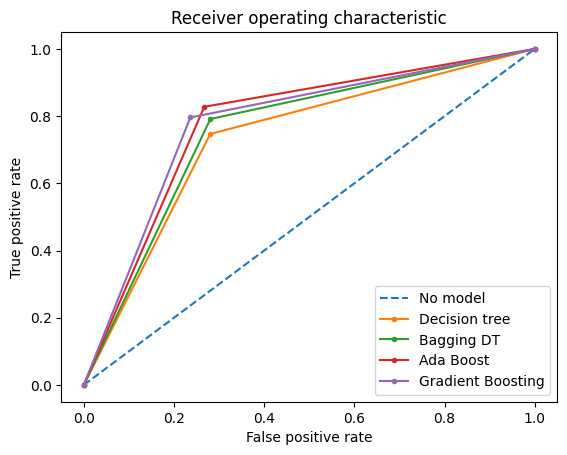

### Exploring the most promising model